### Naive Bayes

- 나이브 베이즈(Naive Bayes)는 텍스트 데이터를 다룰 때 전통적으로 사용되는 분류 방법이다. 이 방법은 이름에도 나타나 있듯이 베이즈 정리(Bayes Theorem)를 기반으로 두고 있다. 나이브 베이즈에 앞서 베이즈 정리부터 학습해보자.

※ 베이즈 정리 - ML_lecture_note_05_extra.pdf

- T를 입력 문서(text), C를 분류할 class 중 하나라고 생각하면 텍스트 데이터가 주어졌을 때, class 중 하나에 속할 확률을 아래와 같이 표시할 수 있다.

$$
\begin{equation} 
P(C|T) = \frac{P(T|C)P(C)}{P(T)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
\end{equation}
$$

- class가 여러개일 경우 각각의 class에 대한 조건부 확률을 계산할 수 있고, 가장 높은 확률을 가지는 class가 해당 문서가 속할 class가 되게 된다. 이를 식으로 표현하면 다음과 같다.

$$
\begin{align}
C_{selected} & = argmax_{C}P(C|T) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
 \\
& = argmax_{C}\frac{P(T|C)P(C)}{P(T)} \\
 \\
& = argmax_{C}P(T|C)P(C)
\end{align}
$$

- 여기서 문서 T가 n개의 독립적인 단어로 이루어진 경우 위 식은 아래와 같이 표현된다. 

$$
\begin{align} 
C_{selected} & = argmax_{C}P(t_{1}, \ t_{2},\ldots, \ t_{n}|C)P(C) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
 \\
& = argmax_{C}P(t_{1}|C)P(t_{2}|C)\cdots P(t_{n}|C)P(C) 
 \\
& = argmax_{C}\prod_{i=1}^{n}P(t_{i}|C)P(C)
\end{align}
$$

- 이때, $P(t_{i}|C)$와 $P(C)$는 다음과 같이 빈도로 계산될 수 있다.

$$
\begin{align} 
\hat{P}(t_{i}|C = c) & = \frac{word \ count(t_{i},c)}{\sum_{t_{i} \in T}word \ count(t_{i},c)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
\end{align}
$$

$$
\begin{align} 
\hat{P}(C) & = \frac{text \ count(C=c)}{N_{text}} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
\end{align}
$$

- 여기서, $text \ count(x,y)$는 텍스트 $y$ 에 포함된 단어 $x$ 의 개수, $text \ count(C=c)$는 class C에 속하는 텍스트 개수, $N_{text}$는 전체 텍스트 개수이다.

- 위와 같은 방법으로 빈도수를 가지고 확률을 계산하게 되면 새로운 텍스트가 입력되었을 때, 이전에 없던 새로운 단어가 나오면 빈도가 0이 되어 확률이 0이 되는 문제가 생긴다. 이러한 문제를 해결하고자 Laplace Smoothing기법을 사용한다. 이 기법은 새로운 단어가 나오더라도 해당 빈도에 인위적으로 1을 더해주면서 확률이 0이 되는 것을 방지한다. Laplace Smoothing을 적용한 $\hat{P}(t_{i}|C=c)$의 계산식은 아래와 같다.

$$
\begin{align} 
\hat{P}(t_{i}|C = c) & = \frac{word \ count(t_{i},c)+1}{\sum_{t_{i} \in T}(word \ count(t_{i},c)+1)} 
= \frac{word \ count(t_{i},c)+1}{\sum_{t_{i} \in T}word \ count(t_{i},c)+|T|} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
\end{align}
$$

- 여기서 $|T|$는 중복을 제외한 단어 전체 개수를 의미한다. 만약 입력 문서의 단어의 개수가 많아지게 되는 경우 확률값의 곱으로 인해 상당히 낮은 숫자가 나타나 비교가 잘 안 되는 경우가 생기는데 이를 위해 로그($log$)를 사용하여 변형해 사용하기도 한다.

### Naive Bayes - Toy Example

- 다음은 5개의 영화 리뷰를 자연어처리 과정을 수행한 결과이다. 이 때 class는 comedy와 action 두 종류만 존재한다고 가정하였다. 

※ 텍스트마이닝 기본내용 (자연어처리) - ML_lecture_note_05_extra_02.html

In [1]:
from IPython.display import Image

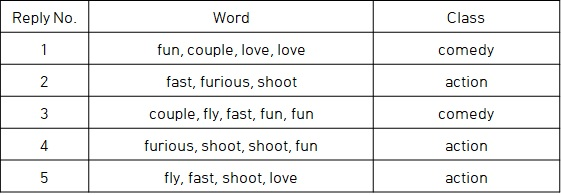

In [2]:
Image('C:/Users/com/Desktop/ML/Lecture_05/Lecture_05_figure_01.jpg', width = 600, height = 300)

- 위 텍스트 자료를 word matrix로 만들면 다음과 같다.

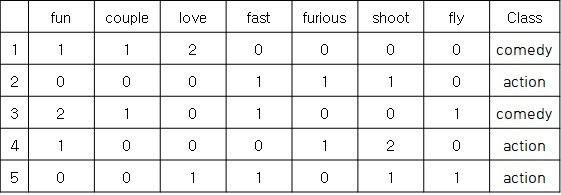

In [3]:
Image('C:/Users/com/Desktop/ML/Lecture_05/Lecture_05_figure_02.jpg', width = 600, height = 300)

- (fun, furious, fast)라는 3개의 단어만 있는 새로운 텍스트가 입력될 때 이 문서의 class가 comedy인지 action인지 판단해보자. 사전에 계산해 놓아야 할 값은 아래와 같다.

$word \ count(fun,comedy) = 3$ <br>
$word \ count(fun,action) = 1$ <br>
$word \ count(furious,comedy) = 0$ <br>
$word \ count(furious,action) = 2$ <br>
$word \ count(fast,comedy) = 1$ <br>
$word \ count(fast,action) = 2$ <br>
$text \ count(C=comedy) = 2$ <br>
$text \ count(C=action) = 3$ <br>
$N_{text} = 5$, $|T| = 7$

- 새로운 텍스트가 주어졌을 때 comedy, action으로 분류 될 각각의 확률을 구하면 다음과 같다.

$$
\begin{align} 
P(C=comedy|text=(fun,furious,fast)) & = P(fun|comedy)P(furious|comedy)P(fast|comedy)P(C=comedy) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
 \\
& = \frac{3+1}{9+7}\cdot\frac{0+1}{9+7}\cdot\frac{1+1}{9+7}\cdot\frac{2}{5} \\
 \\
& = 0.00078
\end{align}
$$

$$
\begin{align} 
P(C=acion|text=(fun,furious,fast)) & = P(fun|action)P(furious|action)P(fast|action)P(C=action) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
 \\
& = \frac{1+1}{11+7}\cdot\frac{2+1}{11+7}\cdot\frac{2+1}{11+7}\cdot\frac{3}{5} \\
 \\
& = 0.0018
\end{align}
$$

- 계산 결과, action으로 분류될 확률이 comedy로 분류될 확률보다 높으므로 최종적으로 새로운 텍스트는 action으로 분류된다.

### Naive Bayes 실습 - news 데이터셋

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [6]:
from sklearn.datasets import fetch_20newsgroups

In [7]:
news = fetch_20newsgroups()

In [8]:
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [9]:
# 독립변수와 종속변수 분리
X, Y, labels = news.data, news.target, news.target_names

In [10]:
len(X)

11314

In [11]:
X[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [12]:
len(Y)

11314

In [13]:
print(Y[3000:3500])

[17  9 17  5  1  3 19 13  5 11 19 15  6 15 12  1 14  8 14 15  6 19  6  5
 19  1  6  3 14 17 15 14 17  7 16  3 11  6 12 12 15 10  7 14 14 10  1  2
 13  3  2 12 13  6  3  1  9  4  9  4  5 18  8 18 15 18 13  8  9 15 14  9
  6  1 14  9 15  1  2  4  3  4  8  9  2 18  6 16  1 13 14 11 12  8  1 16
 14 14  6 15 17 17  8  7  9  5  4 17  4 12  7  1  7 12 12  9 10 17  2  1
  1  0  6 15  1 17  5  6  9 13  5  7 13 17 16 14 17 13  0  0  4 16  0 13
 17  8  8  5  3 19 10  4 17  3  9  3  0 17  1  4  5 13 10  6 18  0 15 10
  2  6 11  3  0 15  2 19  5 13  6  6 19 11 16  7 18 13  6 13  3 15  0 16
 19  1  6  4 16  6  2 15 17  8 14 18 18  5 18 15 13  3 18 17 19 13 14  8
 15  2  1 18 11 15 14  5  1  8  7  4 16  9  2 11 11 15 18 11 11  0 13 11
  9  6  9  7 15  3  3  4 15  9 12 13 18  8  1 13  8 17 19 15  3  1 19 17
  1 13 10 16  5  8 11 11 14  4  8 11 14  6 14  1 15  4 17  2  8 14 15 11
  3 19  8 10 12  2 14 14 14  1  9  8  6 16  6 13 16  8 13  5 15  6  1  7
  6 10  2  3 18 10  9  7 17  8 18  1  6 13 18  9 14

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234, stratify=Y)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [17]:
# 데이터 전처리(벡터화)
vectorizer = CountVectorizer()
tfid = TfidfTransformer()

In [18]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
# dataframe 형태에서 오류남

In [19]:
X_train_tfid = tfid.fit_transform(X_train_vec)
X_test_tfid = tfid.transform(X_test_vec)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [21]:
# (다중분류) 나이브 베이즈, 그리드서치로 모델 학습
nb = MultinomialNB()
param_grid = [{'alpha': np.linspace(0.01, 1, 100)}]
gs = GridSearchCV(estimator=nb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train_tfid, Y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid=[{'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])}],
             scoring='accuracy')

In [22]:
print('best hyperparameter: {0}'.format(gs.best_params_))
print('accuracy: {0:.2f}'.format(gs.best_score_))

best hyperparameter: {'alpha': 0.01}
accuracy: 0.90


In [23]:
# 나이브 베이즈 모형 생성
naive_bayes_m = gs.best_estimator_

In [24]:
Y_predict = naive_bayes_m.predict(X_test_tfid)
print(Y_predict)

[12  7 15 ...  9  4 13]


In [25]:
# Test dataset accuracy
accuracy_test = naive_bayes_m.score(X_test_tfid, Y_test)
print('Test dataset Accuracy: {0:.2f}'.format(accuracy_test))

Test dataset Accuracy: 0.90


In [26]:
# 실제값과 예측값 비교
Y_predict = naive_bayes_m.predict(X_test_tfid)
for i in range(10):
    print('Actual: {0} || Predicted: {1}'.format(labels[Y_test[i]], labels[Y_predict[i]]))

Actual: comp.sys.ibm.pc.hardware || Predicted: sci.electronics
Actual: rec.autos || Predicted: rec.autos
Actual: soc.religion.christian || Predicted: soc.religion.christian
Actual: talk.politics.mideast || Predicted: talk.politics.mideast
Actual: sci.electronics || Predicted: sci.electronics
Actual: comp.sys.ibm.pc.hardware || Predicted: comp.sys.ibm.pc.hardware
Actual: talk.politics.guns || Predicted: talk.politics.guns
Actual: rec.motorcycles || Predicted: rec.motorcycles
Actual: sci.crypt || Predicted: sci.crypt
Actual: sci.crypt || Predicted: sci.crypt
